In [276]:
import pandas as pd
import yfinance as yf
import os
from dotenv import load_dotenv
import fredapi
from fredapi import Fred
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline


In [277]:

api_key = ('7204542c6a0195c471d1a9a60ca0752f')
fred = Fred(api_key=api_key)


In [278]:
df = pd.read_csv(filepath_or_buffer='ITM_618_Group_Project_Data_FRED_Graph.csv', header=0, index_col=0,
                 infer_datetime_format=True, parse_dates=['observation_date'])

rec_data = pd.read_csv("USREC2.csv")
rec_data["DATE"] = pd.to_datetime(rec_data["DATE"])

In [279]:
df.columns

Index(['10Y_3MTreasury', '10Y_3MTreasury_chg', 'real_personal income',
       'real_personal_income_chg', 'industrial_Prod', 'industrial_Prod_chg',
       'real_manu', 'real_manu_chg', 'non_farm', 'non_farm_chg'],
      dtype='object')

In [280]:
df = df.asfreq('MS')

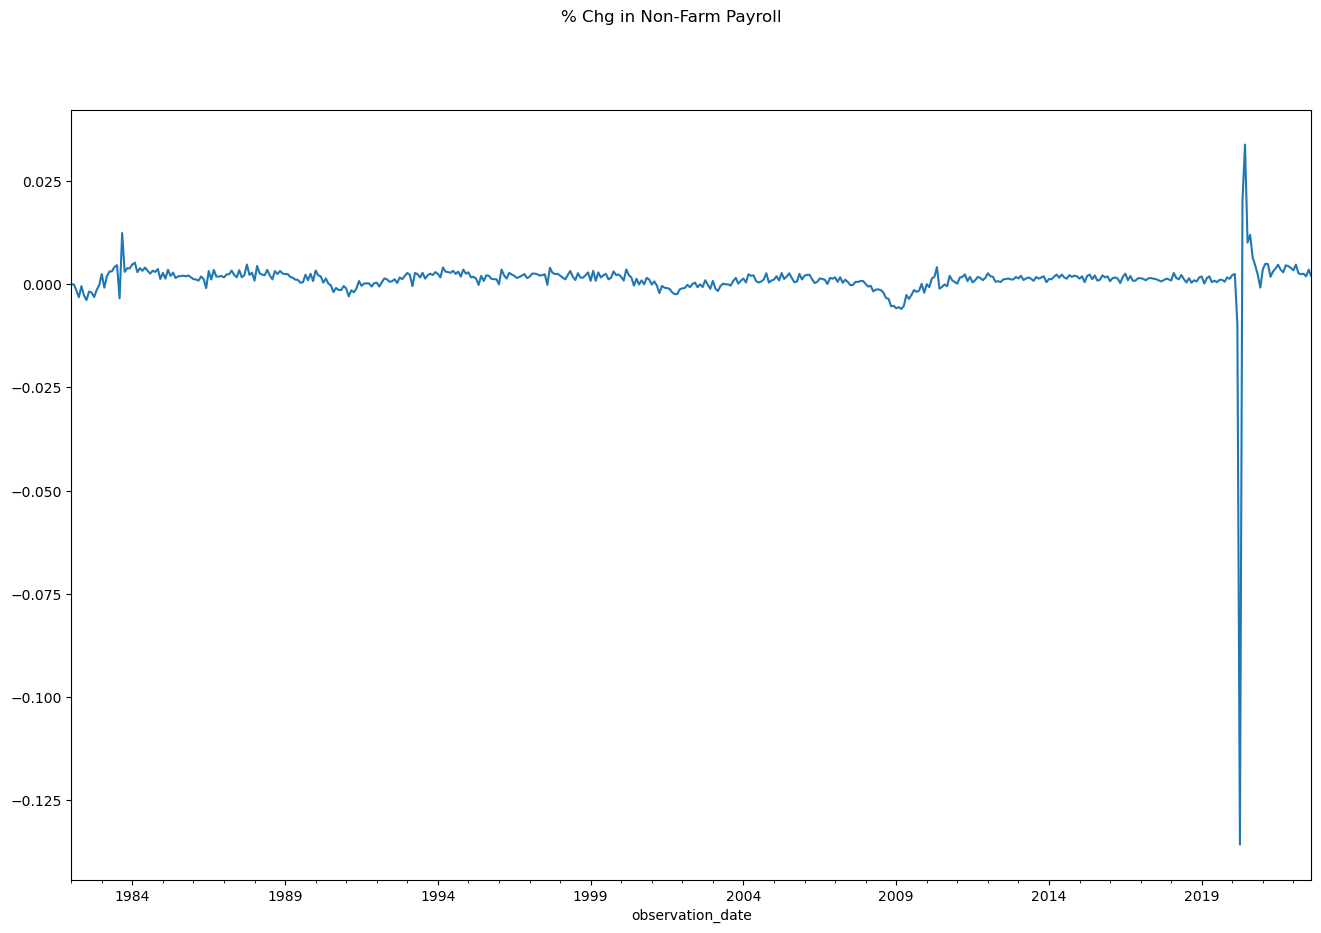

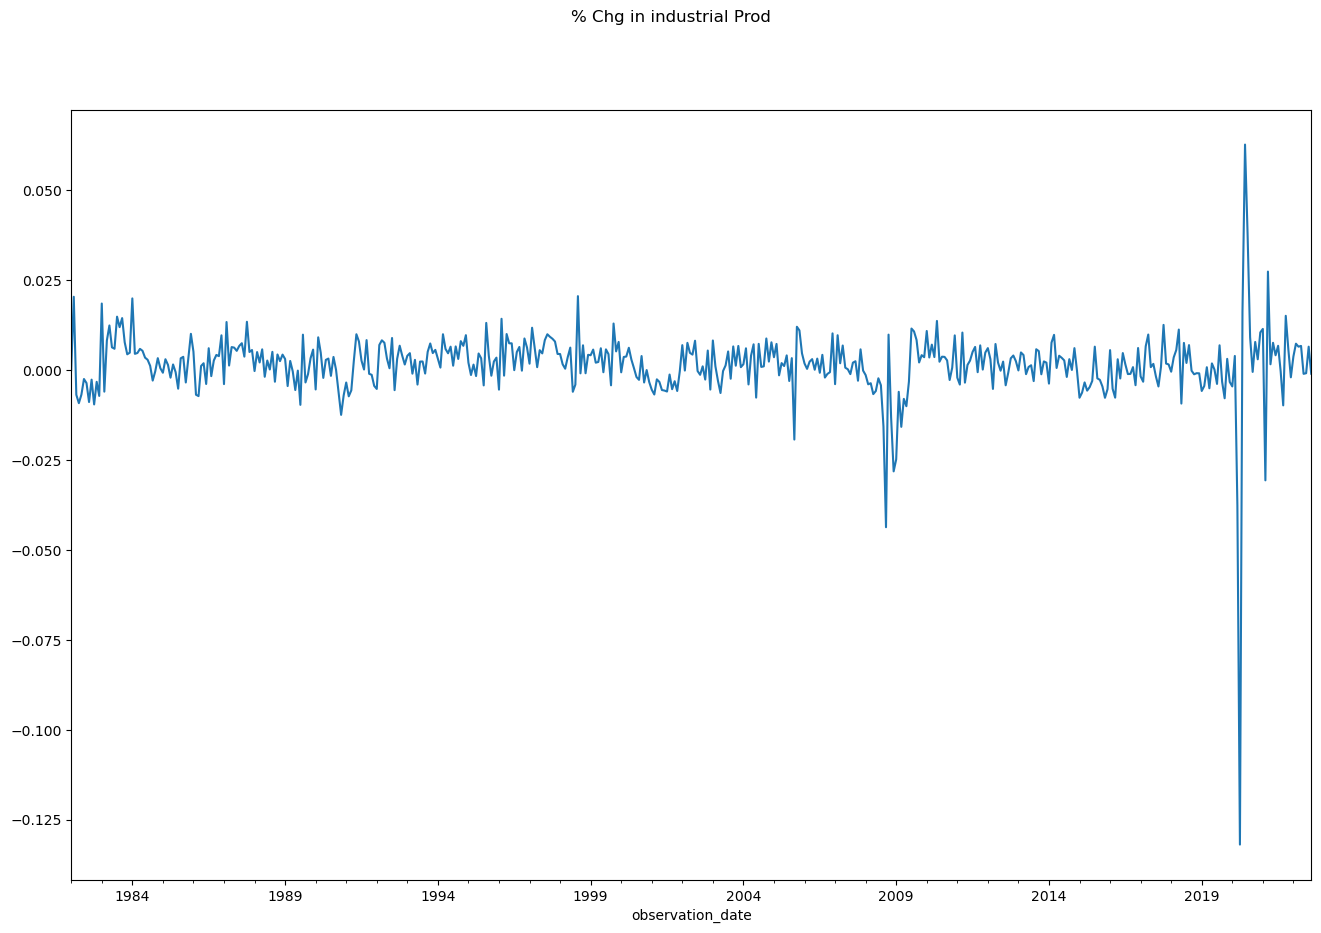

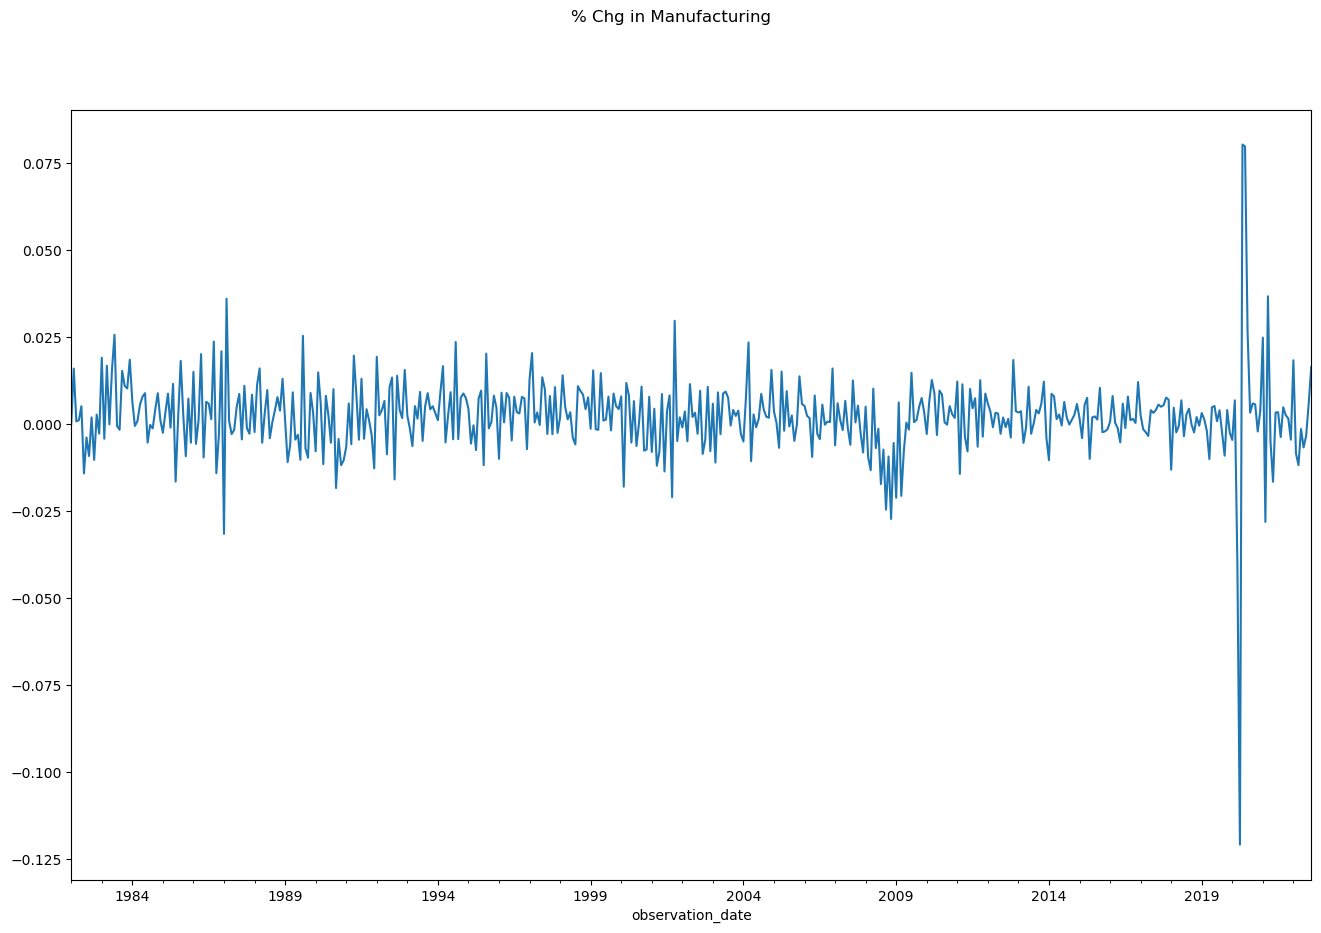

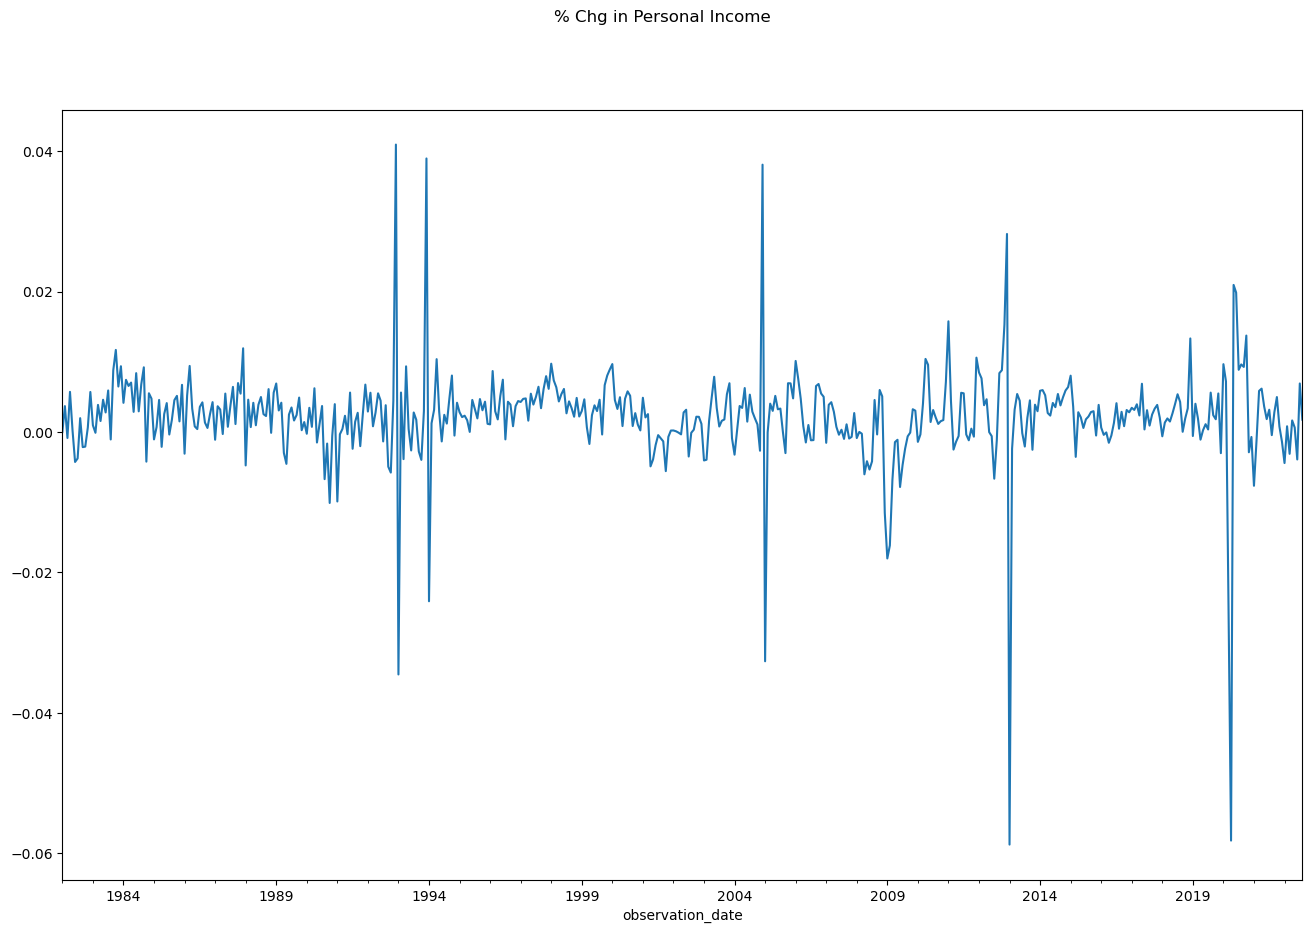

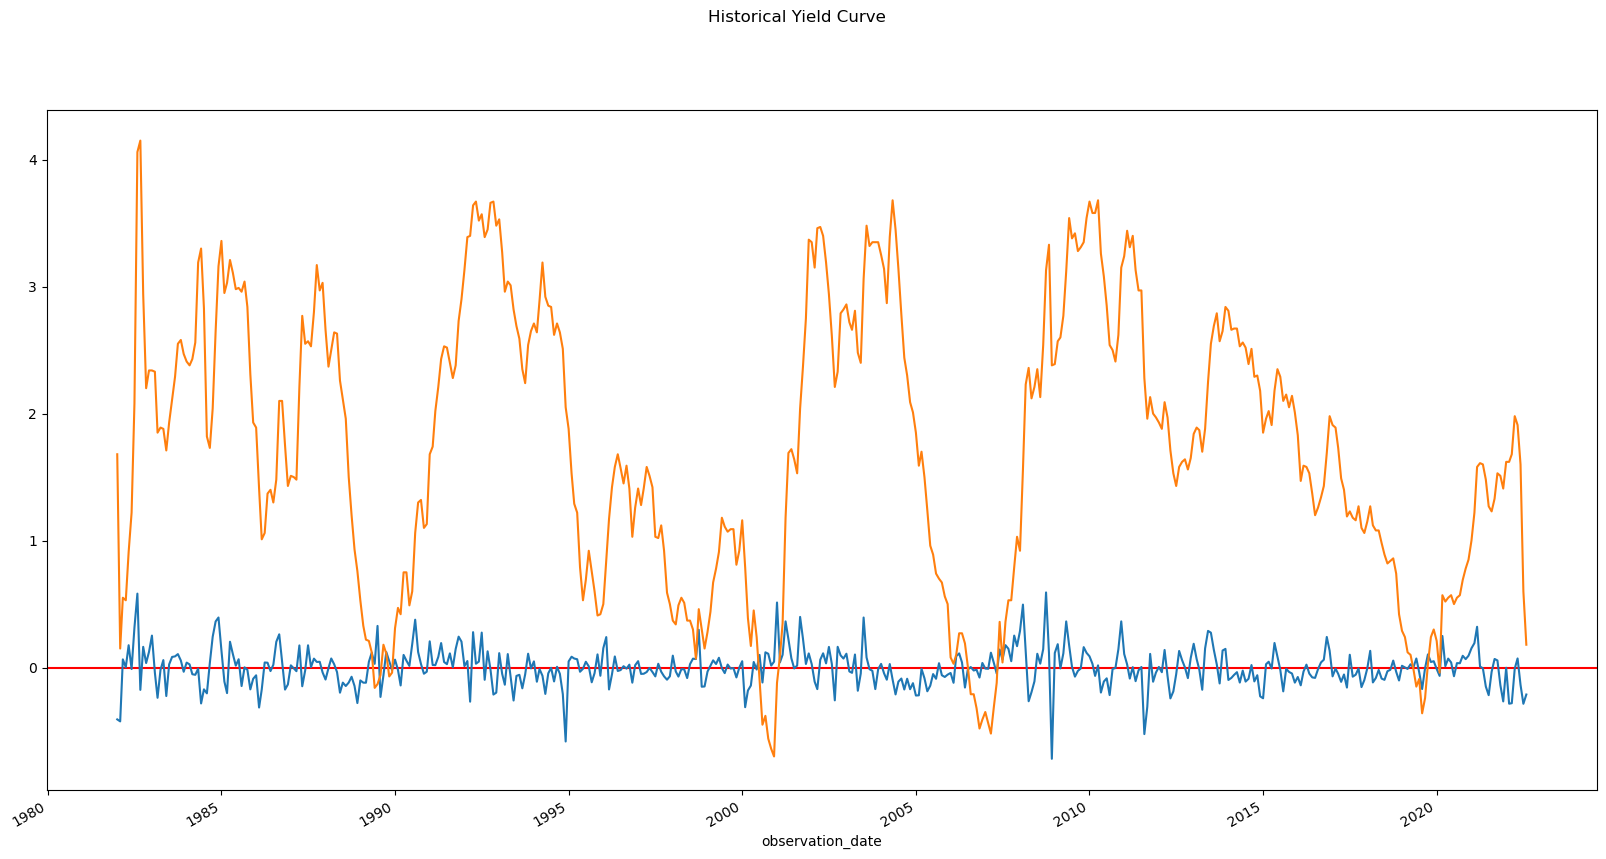

In [281]:
fig = plt.figure(figsize=(16,10))
fig.suptitle('% Chg in Non-Farm Payroll')
df['non_farm_chg'].plot()
plt.show()

fig = plt.figure(figsize=(16,10))
fig.suptitle('% Chg in industrial Prod')
df['industrial_Prod_chg'].plot()
plt.show()

fig = plt.figure(figsize=(16,10))
fig.suptitle('% Chg in Manufacturing')
df['real_manu_chg'].plot()
plt.show()

fig = plt.figure(figsize=(16,10))
fig.suptitle('% Chg in Personal Income')
df['real_personal_income_chg'].plot()
plt.show()

fig, ax = plt.subplots(figsize=(20,10)) 
plt.axhline(y=0, color='r', linestyle='-')
fig.suptitle('Historical Yield Curve')

df['10Y_3MTreasury_chg'].plot()
df['10Y_3MTreasury'].plot()
plt.show()

In [282]:
msdr_model_nonFarm = sm.tsa.MarkovRegression(endog=df['non_farm_chg'], k_regimes=2, trend='c', exog=df['10Y_3MTreasury_chg'], switching_variance=True)
 
msdr_model_results1 = msdr_model_nonFarm.fit(iter=1000)

msdr_model_perinc = sm.tsa.MarkovRegression(endog=df['real_personal_income_chg'], k_regimes=2, trend='c', exog=df['10Y_3MTreasury_chg'], switching_variance=True)
 
msdr_model_results2 = msdr_model_perinc.fit(iter=1000)

msdr_model_manuprod = sm.tsa.MarkovRegression(endog=df['real_manu_chg'], k_regimes=2, trend='c', exog=df['10Y_3MTreasury_chg'], switching_variance=True)
 
msdr_model_results3 = msdr_model_manuprod.fit(iter=1000)

msdr_model_indusprod = sm.tsa.MarkovRegression(endog=df['industrial_Prod_chg'], k_regimes=2, trend='c', exog=df['10Y_3MTreasury_chg'], switching_variance=True)
 
msdr_model_results4 = msdr_model_indusprod.fit(iter=1000)

print(msdr_model_results1.summary())
print(msdr_model_results2.summary())
print(msdr_model_results3.summary())
print(msdr_model_results4.summary())

                        Markov Switching Model Results                        
Dep. Variable:           non_farm_chg   No. Observations:                  488
Model:               MarkovRegression   Log Likelihood                2411.940
Date:                Mon, 28 Nov 2022   AIC                          -4807.880
Time:                        20:35:49   BIC                          -4774.358
Sample:                    01-01-1982   HQIC                         -4794.713
                         - 08-01-2022                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0013   7.08e-05     18.880      0.000       0.001       0.001
x1            -0.0023      0.001     -4.489      0.0

In [283]:
#                         Markov Switching Model Results                        
# ==============================================================================
# Dep. Variable:           non_farm_chg   No. Observations:                  488
# Model:               MarkovRegression   Log Likelihood                2411.940
# Date:                Mon, 28 Nov 2022   AIC                          -4807.880
# Time:                        19:45:56   BIC                          -4774.358
# Sample:                    01-01-1982   HQIC                         -4794.713
#                          - 08-01-2022                                         
# Covariance Type:               approx                                         
#                              Regime 0 parameters                              
# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# const          0.0013   7.08e-05     18.880      0.000       0.001       0.001
# x1            -0.0023      0.001     -4.489      0.000      -0.003      -0.001
# sigma2      2.116e-06   1.57e-07     13.520      0.000    1.81e-06    2.42e-06
#                              Regime 1 parameters                              
# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# const         -0.0050      0.007     -0.675      0.499      -0.019       0.009
# x1             0.0039      0.031      0.128      0.898      -0.057       0.065
# sigma2         0.0010      0.000      2.933      0.003       0.000       0.002
#                          Regime transition parameters                         
# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# p[0->0]        0.9934      0.004    260.343      0.000       0.986       1.001
# p[1->0]        0.1543      0.083      1.862      0.063      -0.008       0.317
# ==============================================================================

# Warnings:
# [1] Covariance matrix calculated using numerical (complex-step) differentiation.
#                            Markov Switching Model Results                           
# ====================================================================================
# Dep. Variable:     real_personal_income_chg   No. Observations:                  488
# Model:                     MarkovRegression   Log Likelihood                1974.778
# Date:                      Mon, 28 Nov 2022   AIC                          -3933.556
# Time:                              19:45:56   BIC                          -3900.034
# Sample:                          01-01-1982   HQIC                         -3920.388
#                                - 08-01-2022                                         
# Covariance Type:                     approx                                         
#                              Regime 0 parameters                              
# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# const          0.0024      0.000     13.821      0.000       0.002       0.003
# x1            -0.0032      0.001     -2.717      0.007      -0.005      -0.001
# sigma2      1.206e-05   9.93e-07     12.139      0.000    1.01e-05     1.4e-05
#                              Regime 1 parameters                              
# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# const         -0.0011      0.005     -0.225      0.822      -0.010       0.008
# x1            -0.0209      0.025     -0.829      0.407      -0.070       0.029
# sigma2         0.0006      0.000      3.096      0.002       0.000       0.001
#                          Regime transition parameters                         
# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# p[0->0]        0.9808      0.008    126.605      0.000       0.966       0.996
# p[1->0]        0.3025      0.106      2.854      0.004       0.095       0.510
# ==============================================================================

# Warnings:
# [1] Covariance matrix calculated using numerical (complex-step) differentiation.
#                         Markov Switching Model Results                        
# ==============================================================================
# Dep. Variable:          real_manu_chg   No. Observations:                  488
# Model:               MarkovRegression   Log Likelihood                1620.609
# Date:                Mon, 28 Nov 2022   AIC                          -3225.219
# Time:                        19:45:56   BIC                          -3191.696
# Sample:                    01-01-1982   HQIC                         -3212.051
#                          - 08-01-2022                                         
# Covariance Type:               approx                                         
#                              Regime 0 parameters                              
# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# const          0.0023      0.000      6.468      0.000       0.002       0.003
# x1            -0.0064      0.003     -2.490      0.013      -0.011      -0.001
# sigma2      5.678e-05   4.17e-06     13.632      0.000    4.86e-05    6.49e-05
#                              Regime 1 parameters                              
# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# const         -0.0004      0.008     -0.050      0.960      -0.016       0.015
# x1            -0.0028      0.034     -0.083      0.934      -0.068       0.063
# sigma2         0.0015      0.000      3.215      0.001       0.001       0.002
#                          Regime transition parameters                         
# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# p[0->0]        0.9871      0.006    160.646      0.000       0.975       0.999
# p[1->0]        0.2246      0.095      2.367      0.018       0.039       0.411
# ==============================================================================

# Warnings:
# [1] Covariance matrix calculated using numerical (complex-step) differentiation.
#                          Markov Switching Model Results                        
# ===============================================================================
# Dep. Variable:     industrial_Prod_chg   No. Observations:                  488
# Model:                MarkovRegression   Log Likelihood                1805.525
# Date:                 Mon, 28 Nov 2022   AIC                          -3595.050
# Time:                         19:45:56   BIC                          -3561.527
# Sample:                     01-01-1982   HQIC                         -3581.882
#                           - 08-01-2022                                         
# Covariance Type:                approx                                         
#                              Regime 0 parameters                              
# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# const          0.0020      0.000      8.219      0.000       0.002       0.003
# x1            -0.0063      0.002     -3.564      0.000      -0.010      -0.003
# sigma2      2.763e-05   2.05e-06     13.485      0.000    2.36e-05    3.16e-05
#                              Regime 1 parameters                              
# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# const         -0.0111      0.010     -1.157      0.247      -0.030       0.008
# x1             0.0194      0.037      0.527      0.598      -0.053       0.091
# sigma2         0.0015      0.001      2.867      0.004       0.000       0.002
#                          Regime transition parameters                         
# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# p[0->0]        0.9904      0.006    178.551      0.000       0.980       1.001
# p[1->0]        0.2340      0.113      2.073      0.038       0.013       0.455
# ==============================================================================

# Warnings:
# [1] Covariance matrix calculated using numerical (complex-step) differentiation.


In [284]:
df_r = pd.read_csv('ITM_618_Group_Project_Data_FRED_Graph.csv', header=0, index_col=0, infer_datetime_format=True, parse_dates=['observation_date'])

[Text(0.5, 1.0, 'Smoothed probability of regime 1 super-imposed on 10YEAR-3Month yield Spread as Recceson indicator')]

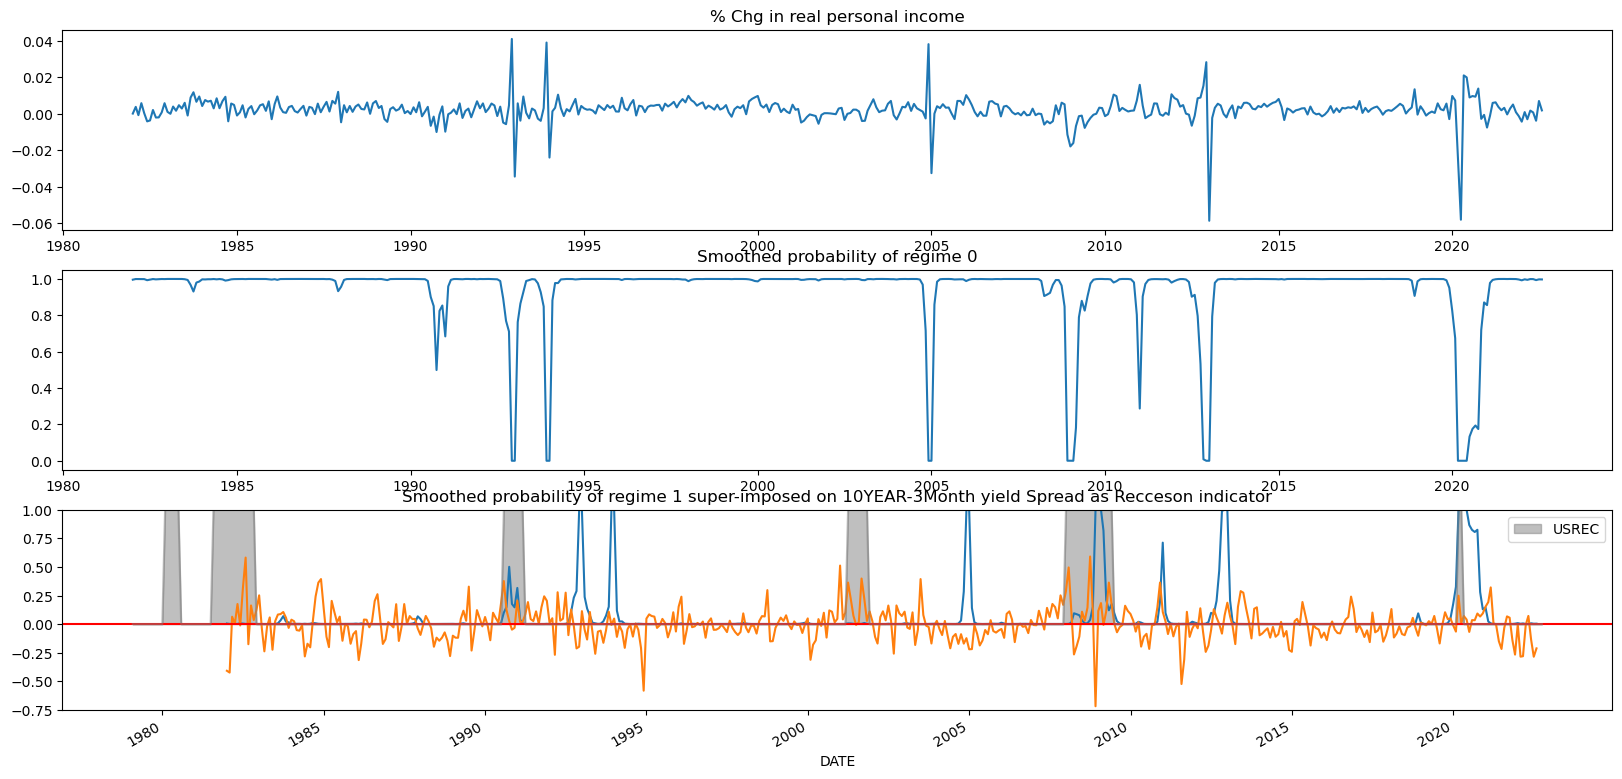

In [285]:

figure, axes = plt.subplots(3, figsize=(20,10)) 

ax = axes[0]
ax.plot(df.index, df['real_personal_income_chg'])
ax.set(title='% Chg in real personal income')

ax = axes[1]
ax.plot(df.index, msdr_model_results2.smoothed_marginal_probabilities[0])
ax.set(title='Smoothed probability of regime 0', )

ax = axes[2]
ax.plot(df.index, msdr_model_results2.smoothed_marginal_probabilities[1])
ax.plot(df_r.index, df_r['10Y_3MTreasury_chg'])
plt.axhline(y=0, color='r', linestyle='-')
rec_data.plot.area(ax=ax, x='DATE', alpha=0.5, color="gray")
plt.ylim(-0.75, 1)
ax.set(title='Smoothed probability of regime 1 super-imposed on 10YEAR-3Month yield Spread as Recceson indicator')

[Text(0.5, 1.0, 'Smoothed probability of regime 1 super-imposed on 10YEAR-3Month yield Spread as Recceson indicator')]

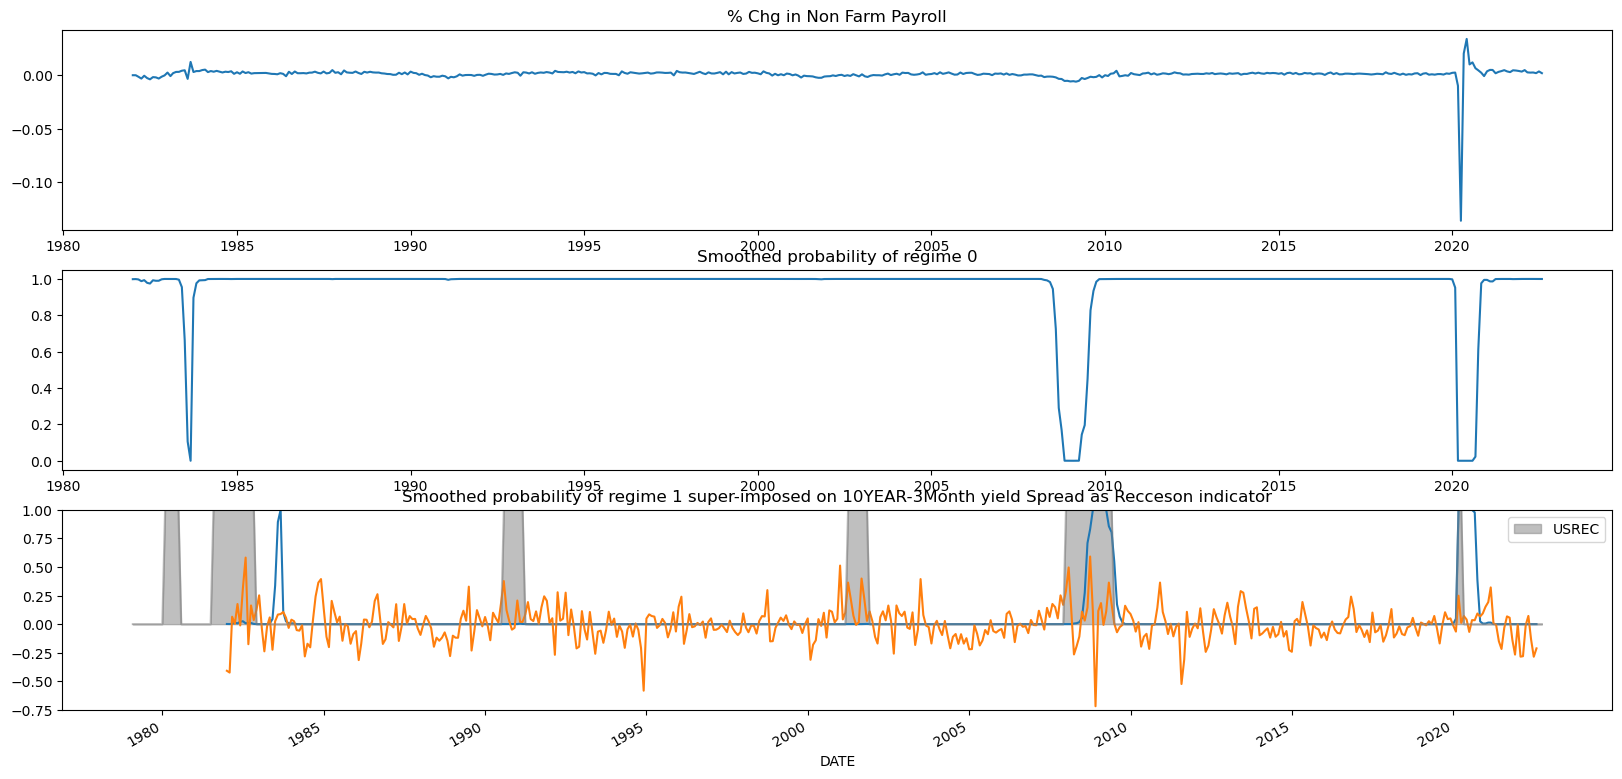

In [286]:
figure, axes = plt.subplots(3, figsize=(20,10)) 

ax = axes[0]
ax.plot(df.index, df['non_farm_chg'])

ax.set(title='% Chg in Non Farm Payroll')

ax = axes[1]
ax.plot(df.index, msdr_model_results1.smoothed_marginal_probabilities[0])
ax.set(title='Smoothed probability of regime 0', )

ax = axes[2]
ax.plot(df.index, msdr_model_results1.smoothed_marginal_probabilities[1])
ax.plot(df_r.index, df_r['10Y_3MTreasury_chg'])
rec_data.plot.area(ax=ax, x='DATE', alpha=0.5, color="gray")
plt.ylim(-0.75, 1)
ax.set(title='Smoothed probability of regime 1 super-imposed on 10YEAR-3Month yield Spread as Recceson indicator')

[Text(0.5, 1.0, 'Smoothed probability of regime 1 super-imposed on 10YEAR-3Month yield Spread as Recceson indicator')]

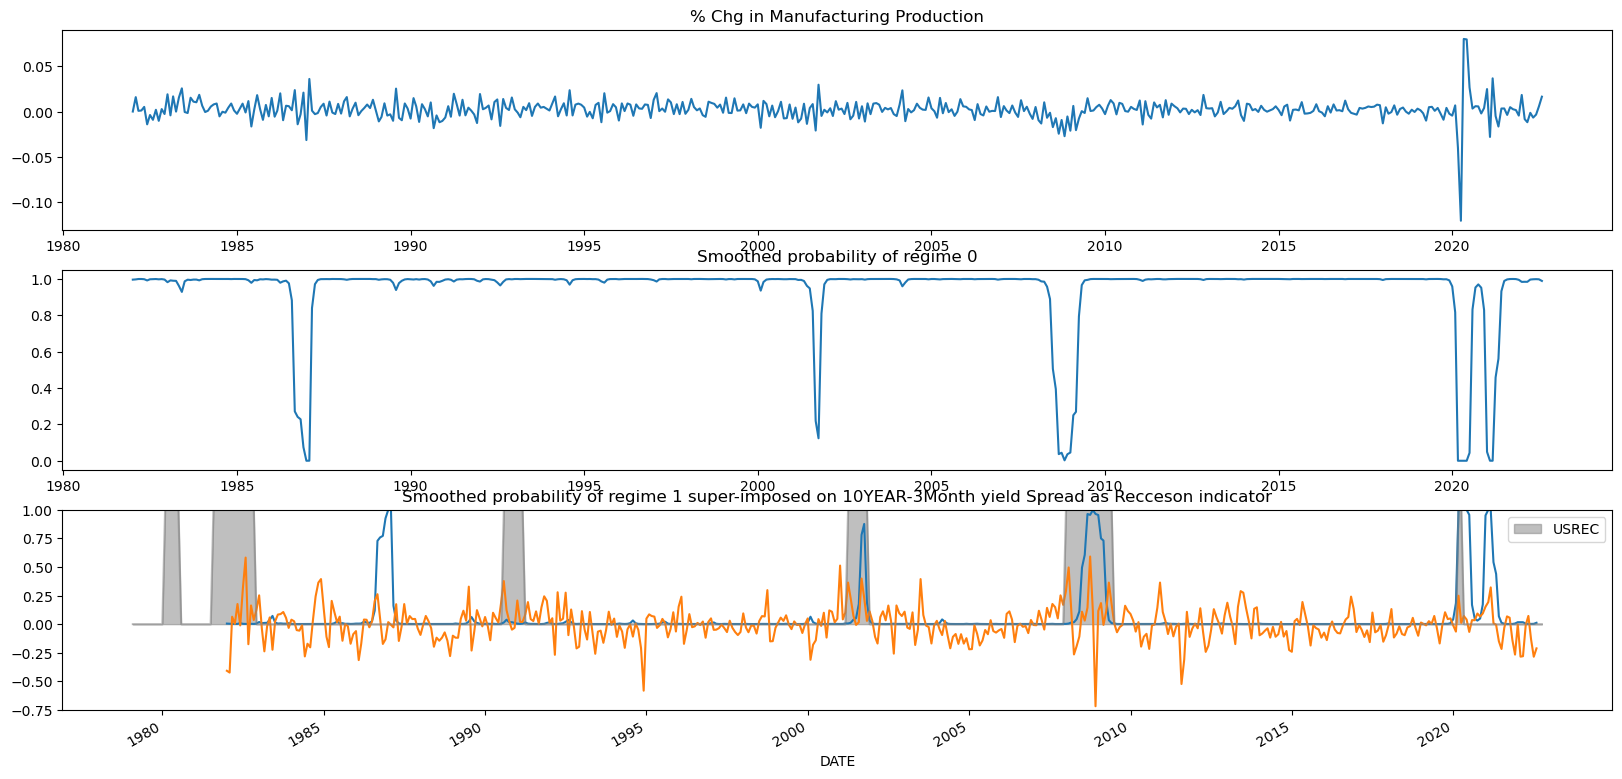

In [302]:
figure, axes = plt.subplots(3, figsize=(20,10)) 

ax = axes[0]
ax.plot(df.index, df['real_manu_chg'])
ax.set(title='% Chg in Manufacturing Production')

ax = axes[1]
ax.plot(df.index, msdr_model_results3.smoothed_marginal_probabilities[0])
ax.set(title='Smoothed probability of regime 0', )

ax = axes[2]
ax.plot(df.index, msdr_model_results3.smoothed_marginal_probabilities[1])
ax.plot(df_r.index, df_r['10Y_3MTreasury_chg'])
rec_data.plot.area(ax=ax, x='DATE', alpha=0.5, color="gray")
plt.ylim(-0.75, 1)
ax.set(title='Smoothed probability of regime 1 super-imposed on 10YEAR-3Month yield Spread as Recceson indicator')



[Text(0.5, 1.0, 'Smoothed probability of regime 1 super-imposed on 10YEAR-3Month yield Spread as Recceson indicator')]

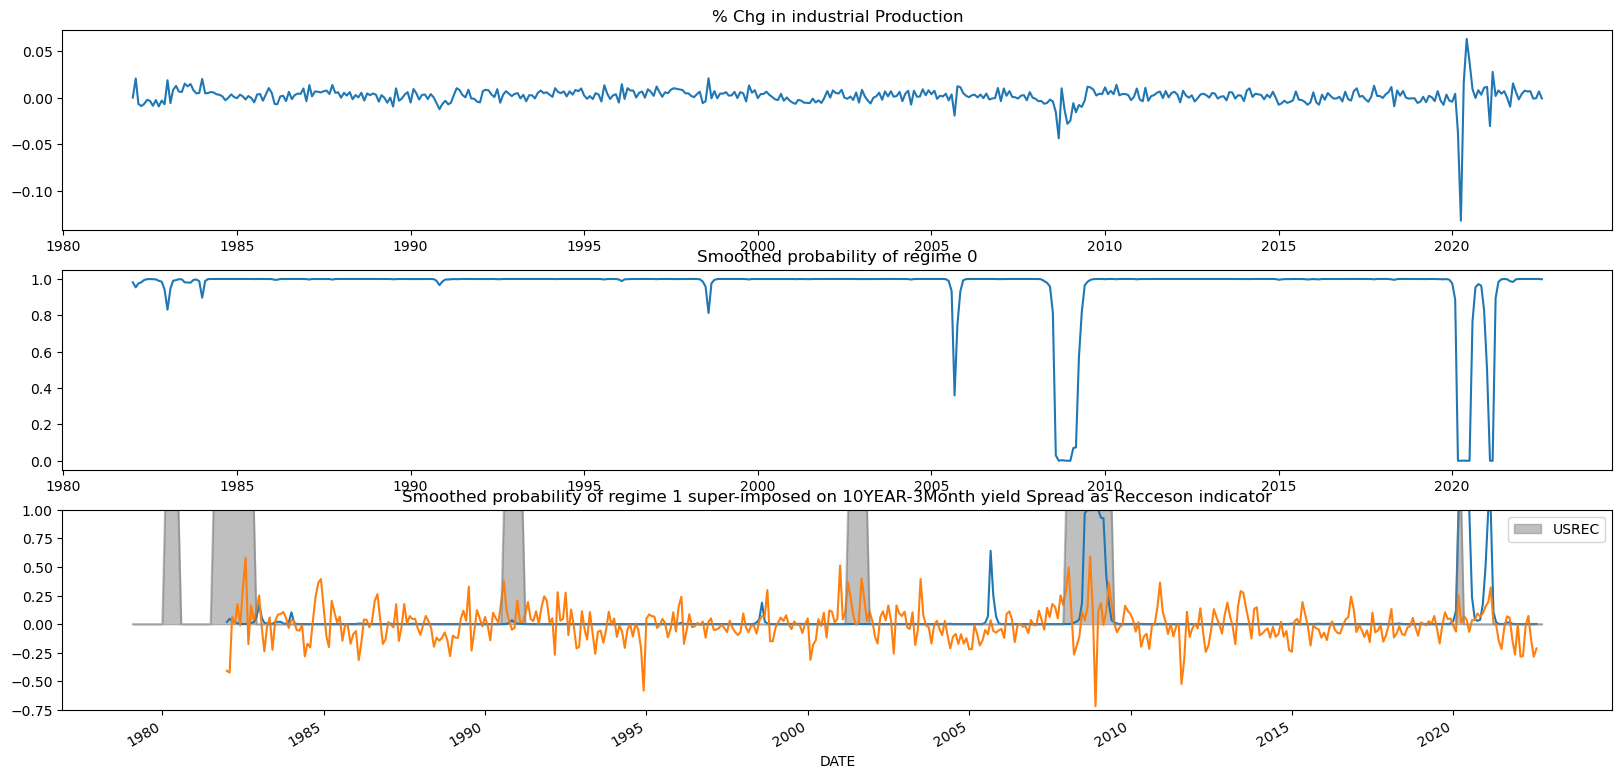

In [288]:
figure, axes = plt.subplots(3, figsize=(20,10)) 

ax = axes[0]
ax.plot(df.index, df['industrial_Prod_chg'])
ax.set(title='% Chg in industrial Production')

ax = axes[1]
ax.plot(df.index, msdr_model_results4.smoothed_marginal_probabilities[0])
ax.set(title='Smoothed probability of regime 0', )

ax = axes[2]
ax.plot(df.index, msdr_model_results4.smoothed_marginal_probabilities[1])
ax.plot(df_r.index, df_r['10Y_3MTreasury_chg'])
rec_data.plot.area(ax=ax, x='DATE', alpha=0.5, color="gray")
plt.ylim(-0.75, 1)
ax.set(title='Smoothed probability of regime 1 super-imposed on 10YEAR-3Month yield Spread as Recceson indicator')

In [289]:
# Pull recession probabilities
recession_prob = fred.get_series('RECPROUSM156N', observation_start='1990-01-01')
recession_prob = recession_prob.dropna()
recession_prob

# The forecast has a delay of approx. 3 months due to delay between collecting data and computation of the forecast.

1990-01-01    0.56
1990-02-01    0.54
1990-03-01    0.72
1990-04-01    1.48
1990-05-01    1.90
              ... 
2022-05-01    0.52
2022-06-01    0.70
2022-07-01    0.34
2022-08-01    0.32
2022-09-01    0.48
Length: 393, dtype: float64

In [290]:
# Pull S&P Index historical values from yfinance API
ticker = "^GSPC" 
start= "1990-01-01" 
end= "2022-08-02"

sp_history = yf.download(ticker, start=start, end=end, progress=False)
sp_history = sp_history.asfreq(freq='D').ffill().dropna()
sp_history

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,359.690002,1.620700e+08
1990-01-03,359.690002,360.589996,357.890015,358.760010,358.760010,1.923300e+08
1990-01-04,358.760010,358.760010,352.890015,355.670013,355.670013,1.770000e+08
1990-01-05,355.670013,355.670013,351.350006,352.200012,352.200012,1.585300e+08
1990-01-06,355.670013,355.670013,351.350006,352.200012,352.200012,1.585300e+08
...,...,...,...,...,...,...
2022-07-28,4026.129883,4078.949951,3992.969971,4072.429932,4072.429932,4.413000e+09
2022-07-29,4087.330078,4140.149902,4079.219971,4130.290039,4130.290039,4.616360e+09
2022-07-30,4087.330078,4140.149902,4079.219971,4130.290039,4130.290039,4.616360e+09


In [291]:
# Pull VIX historical data
ticker = "^VIX"
start= "1990-01-01" 
end= "2022-08-02"

vix_history = yf.download(ticker, start=start,end=end, progress=False)
vix_history = vix_history.asfreq(freq='D').ffill().dropna()
vix_history

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,17.240000,17.240000,17.240000,17.240000,17.240000,0.0
1990-01-03,18.190001,18.190001,18.190001,18.190001,18.190001,0.0
1990-01-04,19.219999,19.219999,19.219999,19.219999,19.219999,0.0
1990-01-05,20.110001,20.110001,20.110001,20.110001,20.110001,0.0
1990-01-06,20.110001,20.110001,20.110001,20.110001,20.110001,0.0
...,...,...,...,...,...,...
2022-07-28,23.330000,23.540001,22.219999,22.330000,22.330000,0.0
2022-07-29,22.129999,22.160000,21.209999,21.330000,21.330000,0.0
2022-07-30,22.129999,22.160000,21.209999,21.330000,21.330000,0.0


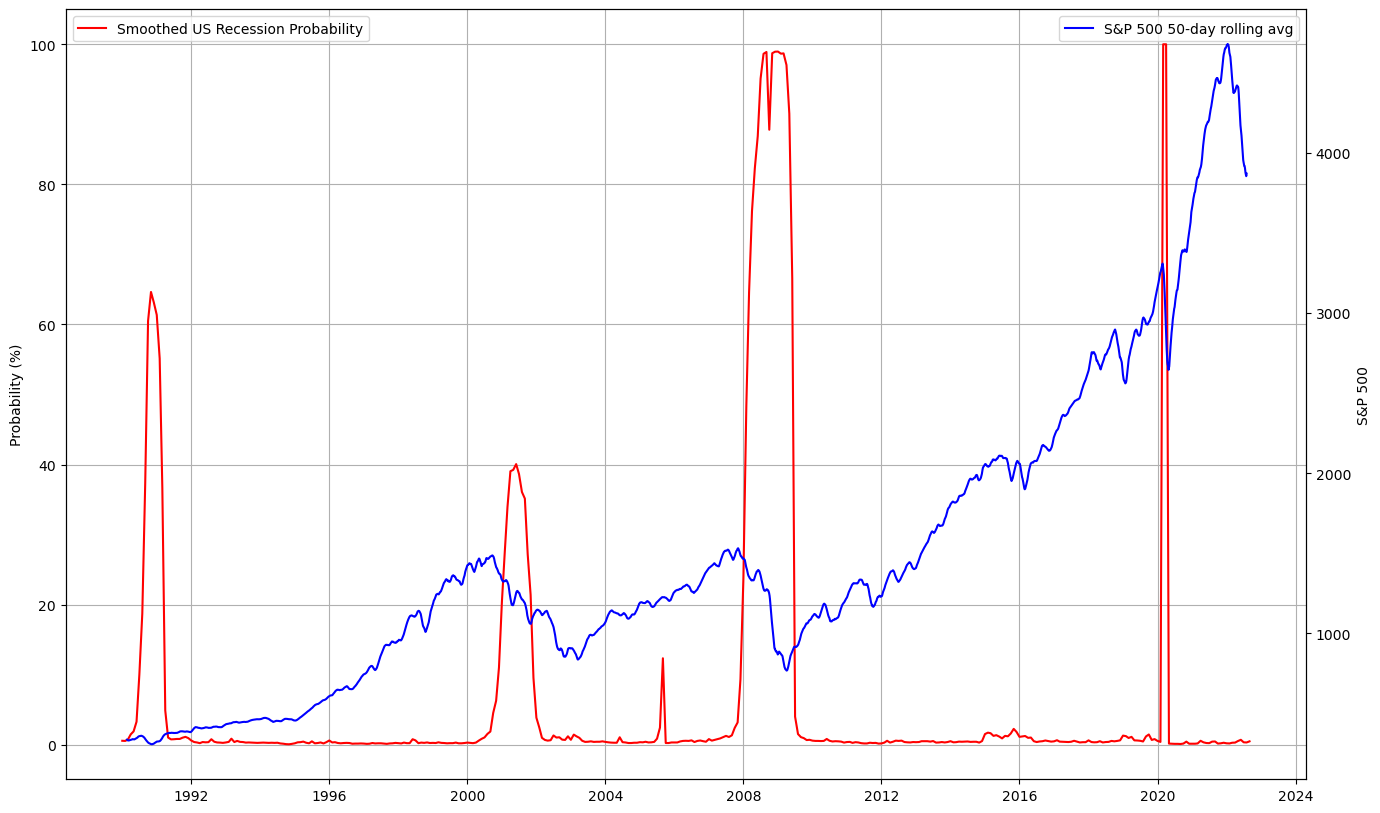

In [292]:
# Plot Recession Probability vs S&P 500
fig, ax = plt.subplots(figsize=(16,10))
plt.plot(recession_prob, label ='Smoothed US Recession Probability', color='r')
ax.set_ylabel('Probability (%)')
plt.grid()
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(sp_history['Adj Close'].rolling(window=50).mean(), label ='S&P 500 50-day rolling avg', color='b')
ax2.set_ylabel('S&P 500')
ax2.legend(loc='upper right')

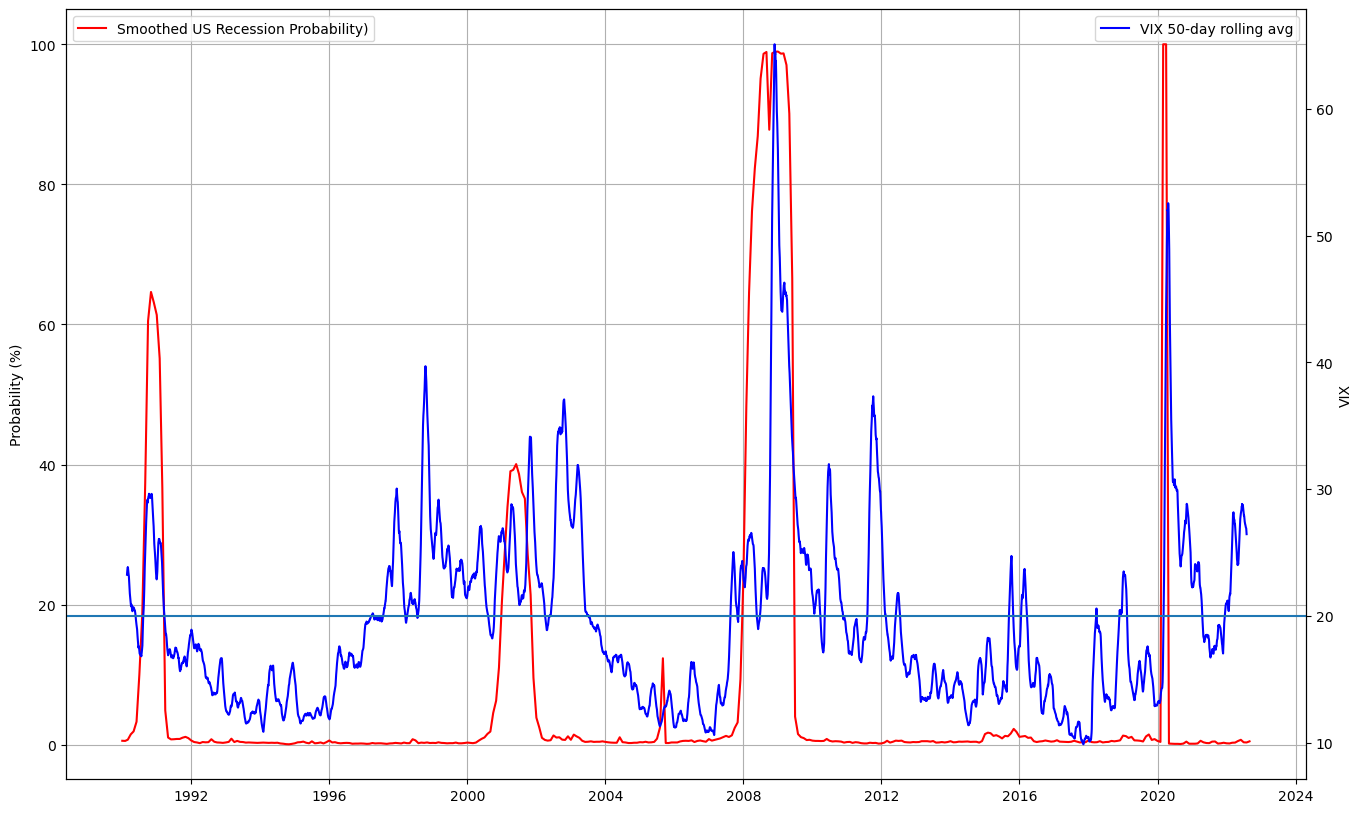

In [293]:
# Plot Recession Probability vs VIX - value of 20 (arbitrarily selected) which is seen as fearful market
fig, ax = plt.subplots(figsize=(16,10))
plt.plot(recession_prob, label ='Smoothed US Recession Probability)', color='r')
ax.set_ylabel('Probability (%)')
plt.grid()
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(vix_history['Adj Close'].rolling(window=50).mean(), label ='VIX 50-day rolling avg', color='b')
ax2.set_ylabel('VIX')
ax2.legend(loc='upper right')
ax2.axhline(y=20)

In [294]:
# Pull 10-Year Treasury Constant Maturity Minus 3-Month Treasury Constant Maturity
ten_three_treasury_spread = fred.get_series('T10Y3M', observation_start='1990-01-01')
ten_three_treasury_spread = ten_three_treasury_spread.dropna()
ten_three_treasury_spread

housing_index = fred.get_series('CSUSHPISA', observation_start='1990-01-01', observation_end='2022-10-01')
housing_index = housing_index.dropna()


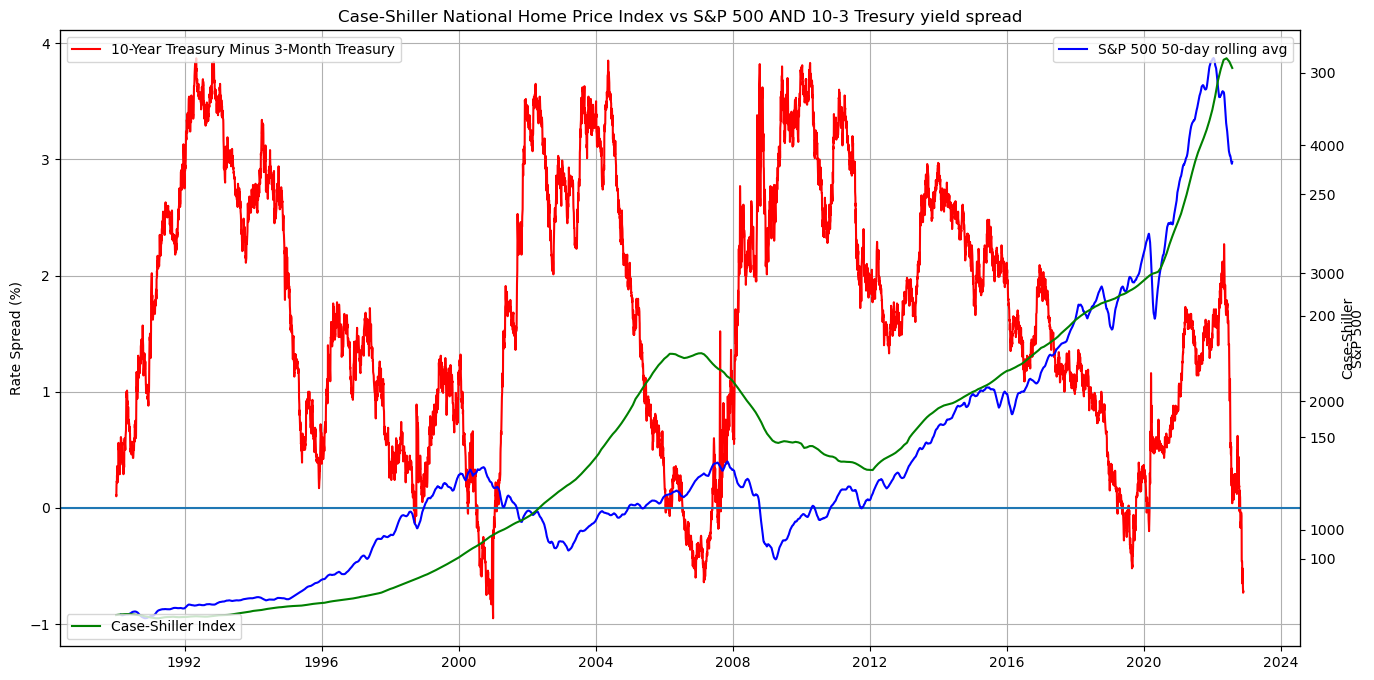

In [295]:
# Plot Ten Year-3 Month Treasury spread vs S&P 500
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(ten_three_treasury_spread, label ='10-Year Treasury Minus 3-Month Treasury', color='r')
ax.set_ylabel('Rate Spread (%)')
plt.grid()
ax.legend(loc='upper left')
ax.axhline(y=0)

ax2 = ax.twinx()
plt.plot(sp_history['Adj Close'].rolling(window=50).mean(), label ='S&P 500 50-day rolling avg', color='b')
ax2.set_ylabel('S&P 500')
ax2.legend(loc='upper right')

ax2 = ax.twinx()
plt.plot(housing_index, label='Case-Shiller Index', color='g')
ax.set_title('Case-Shiller National Home Price Index vs S&P 500 AND 10-3 Tresury yield spread')
ax2.set_ylabel('Case-Shiller')
ax2.legend(loc='lower left')

In [296]:
treasury_spread_recession_prob = pd.read_excel('allmonth.xls', usecols=['Rec_prob', 'Date'])
treasury_spread_recession_prob =  treasury_spread_recession_prob.set_index('Date')
treasury_spread_recession_prob.tail()

,Rec_prob
Date,
2023-05-31,0.041063
2023-06-30,0.059258
2023-07-31,0.176265
2023-08-31,0.251495
2023-09-30,0.230673


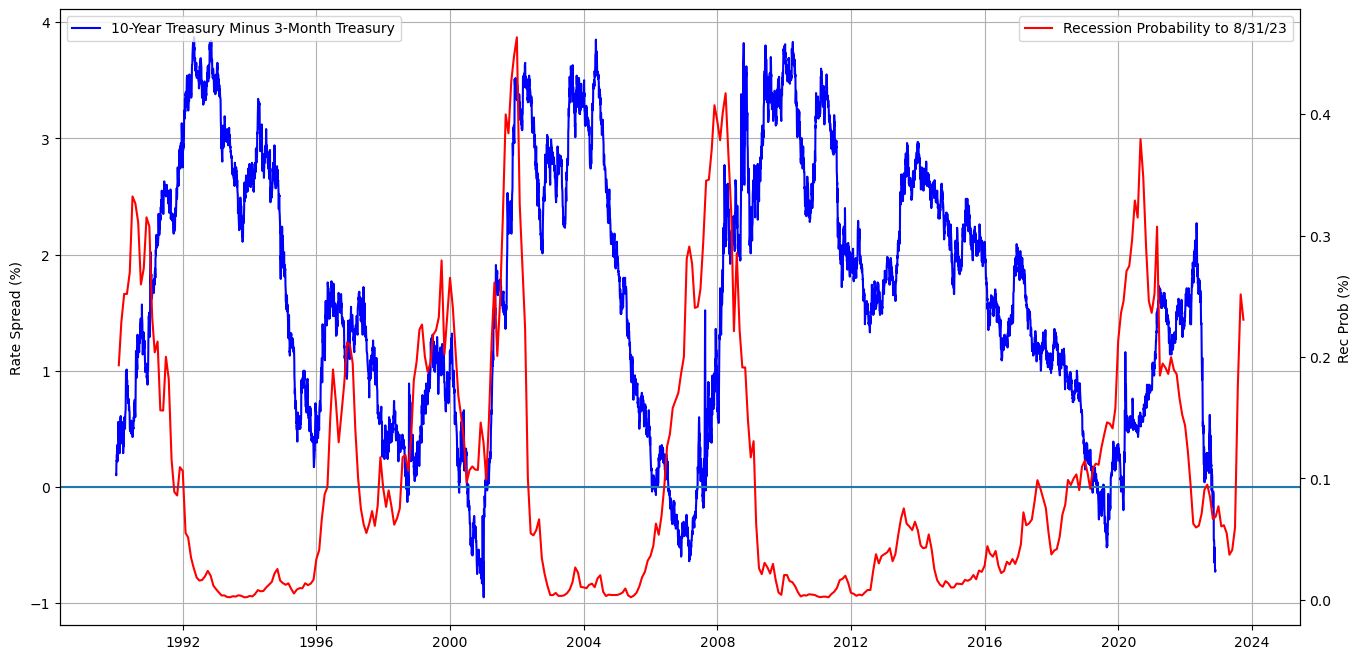

In [297]:
# Plot Ten Year-3 Month Treasury spread vs Recession Probability till 09/30/23
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(ten_three_treasury_spread, label ='10-Year Treasury Minus 3-Month Treasury', color='b')
ax.set_ylabel('Rate Spread (%)')
plt.grid()
ax.legend(loc='upper left')
ax.axhline(y=0)

ax2 = ax.twinx()
plt.plot(treasury_spread_recession_prob['1990':], label ='Recession Probability to 8/31/23', color='r')
ax2.set_ylabel('Rec Prob (%)')
ax2.legend(loc='upper right')

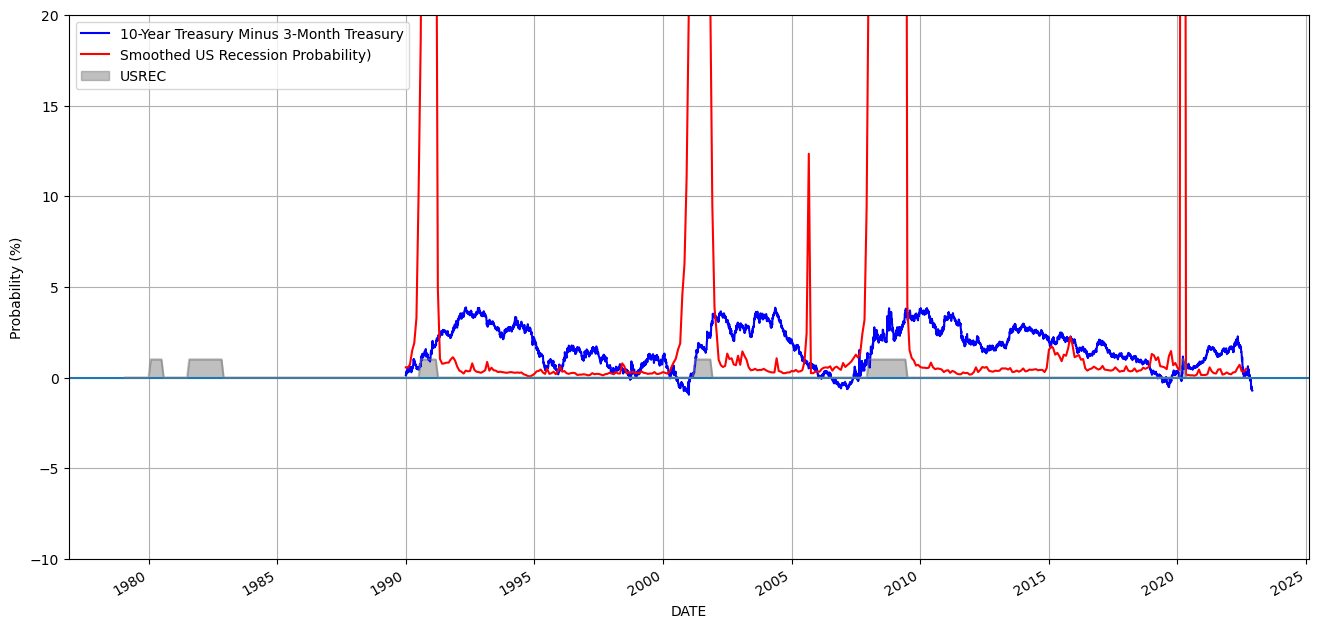

In [298]:
# Plot Ten Year-3 Month Treasury spread vs Recession Probability till 09/30/23
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(ten_three_treasury_spread, label ='10-Year Treasury Minus 3-Month Treasury', color='b')
ax.set_ylabel('Rate Spread (%)')
plt.grid()
ax.legend(loc='upper left')
ax.axhline(y=0)

plt.plot(recession_prob, label ='Smoothed US Recession Probability)', color='r')
rec_data.plot.area(ax=ax, x='DATE', alpha=0.5, color="gray")
plt.ylim(-10, 20)
ax.set_ylabel('Probability (%)')
plt.grid()
ax.legend(loc='upper left')

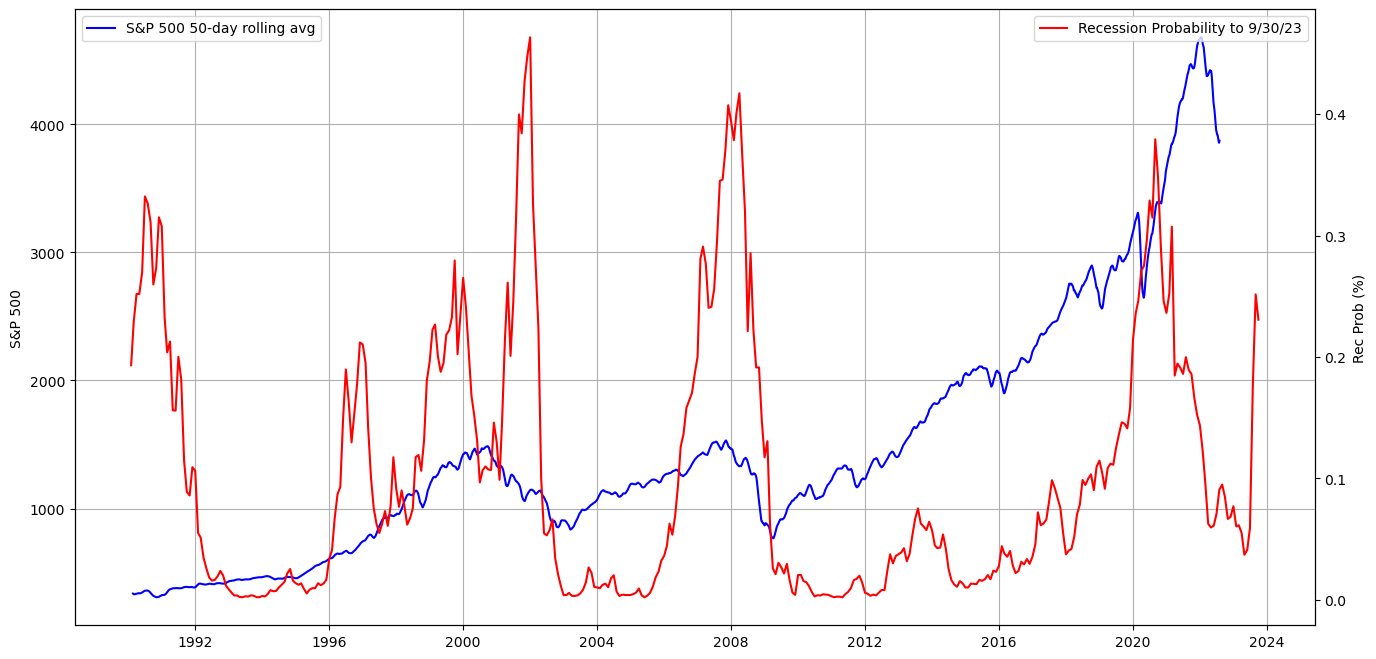

In [299]:
# Plot Recession Probability vs S&P 500
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(sp_history['Adj Close'].rolling(window=50).mean(), label ='S&P 500 50-day rolling avg', color='b')
ax.set_ylabel('S&P 500')
plt.grid()
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(treasury_spread_recession_prob['1990':], label ='Recession Probability to 9/30/23', color='r')
ax2.set_ylabel('Rec Prob (%)')
ax2.legend(loc='upper right')

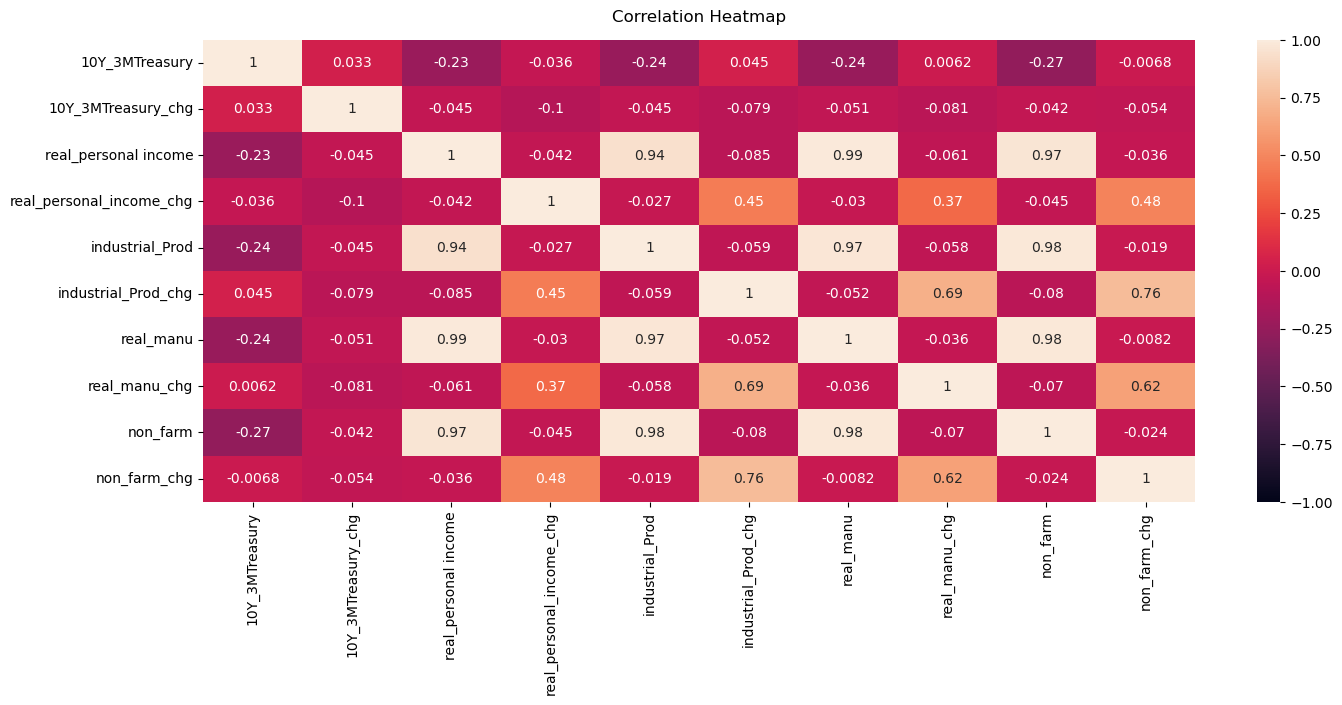

In [300]:
plt.figure(figsize=(16,6))
#Set Diamentions of matrix 

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
#used seaborn bult in to create heat map corralation matrix to visulaze corralations between data sets. 

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=13);
#Set the title 

<!-- Non-Farm Change And Yield

==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9934      0.004    260.343      0.000       0.986       1.001
p[1->0]        0.1543      0.083      1.862      0.063      -0.008       0.317
==============================================================================

Real Personal Income and Yield

==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9808      0.008    126.605      0.000       0.966       0.996
p[1->0]        0.3025      0.106      2.854      0.004       0.095       0.510
==============================================================================

Real Manufacturing production change and Yield 

==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9871      0.006    160.646      0.000       0.975       0.999
p[1->0]        0.2246      0.095      2.367      0.018       0.039       0.411
==============================================================================

Real Industrial Production chg and Yield

==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9904      0.006    178.551      0.000       0.980       1.001
p[1->0]        0.2340      0.113      2.073      0.038       0.013       0.455
============================================================================== -->
